## Preamble and Review

In [18]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

## Datasets

In [19]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

<IPython.core.display.Javascript object>


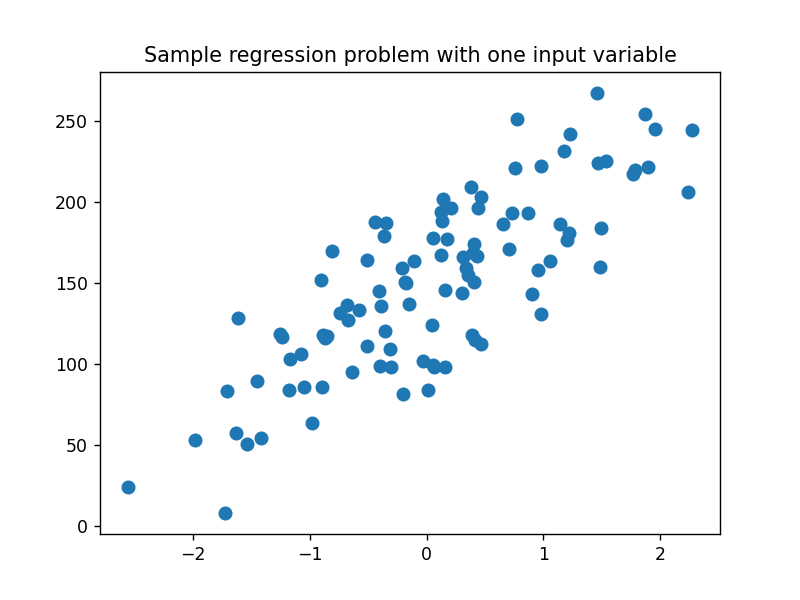

In [20]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


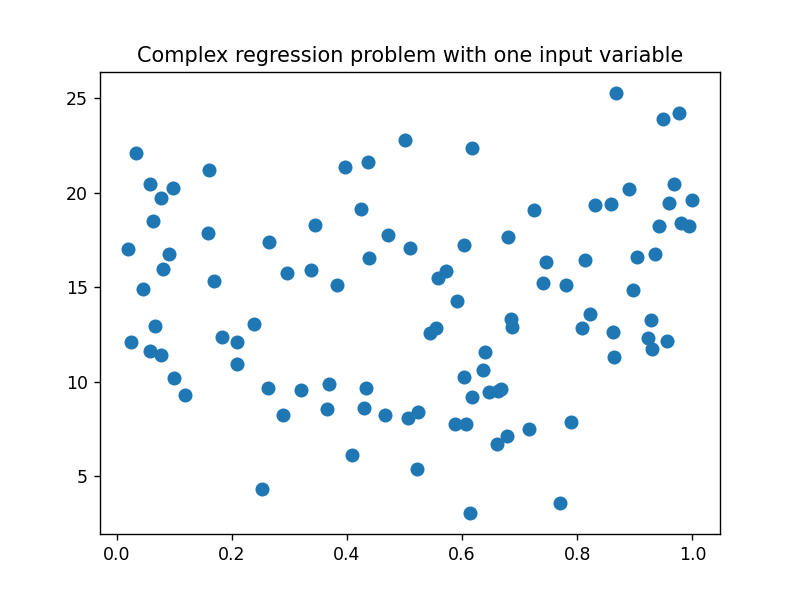

In [22]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


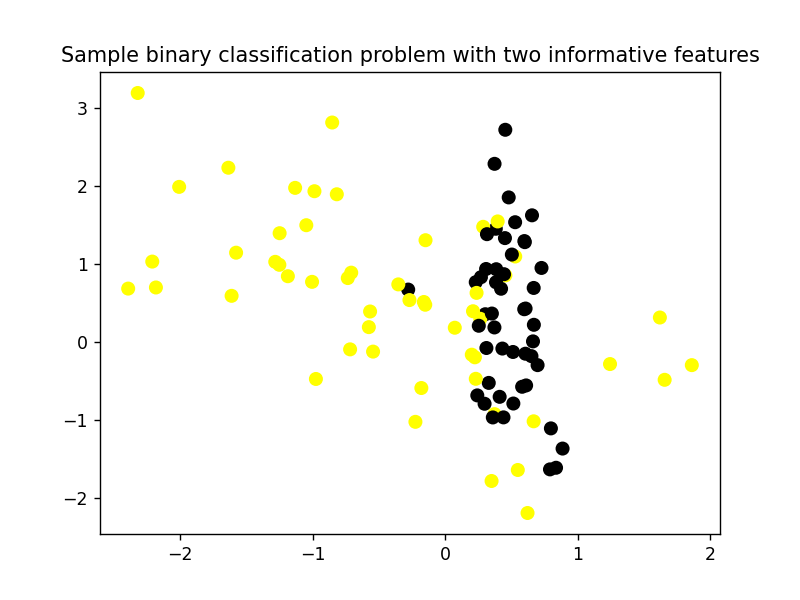

In [25]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 =make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


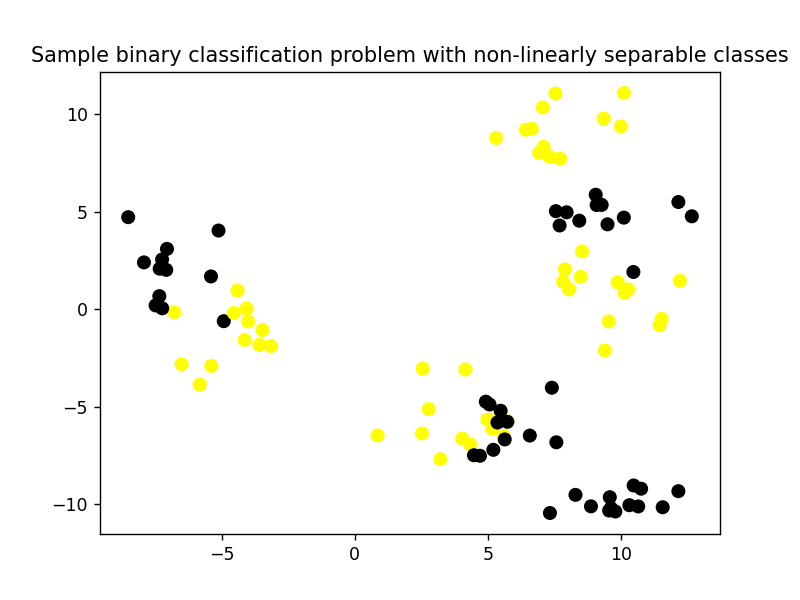

In [26]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [30]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter^2 / area - 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

class:
WDBC-Malignant

WDBC-Benign

In [31]:
X_cancer.shape

(569, 30)

In [32]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [33]:
X_crime

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.00,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,...,29.8,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88
2211,12251,2.68,17.36,31.23,16.97,12.57,12251,100.00,20321,75.06,...,23.8,17.3,14.4,0,0,2.24,75.16,49.12,78.79,92.85
2212,32824,2.46,11.81,20.96,9.53,20.73,32824,100.00,27182,59.79,...,30.5,23.9,13.1,44,0,7.35,48.66,46.73,75.54,92.30
2213,13547,2.89,17.16,30.01,14.73,10.42,0,0.00,19899,71.67,...,26.2,23.3,14.1,0,0,2.28,82.26,54.05,79.72,94.06


In [34]:
y_crime

0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

### Support Vector Machines

#### Linear Support Vector Machine

In [65]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# HACER UN DATASET REAL
# HACER UN DATASET REAL
# HACER UN DATASET REAL


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)



clf1 = SVC(kernel = 'linear', C=0.01).fit(X_train, y_train)


print('0.01 C2 Dataset:')
print(clf1.score(X_train, y_train))
print(clf1.score(X_test, y_test))

clf4 = LinearSVC(C=10).fit(X_train, y_train)

print('Linear SVC Dataset:')
print(clf4.score(X_train, y_train))
print(clf4.score(X_test, y_test))

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

#clf = LinearSVC(C=this_C, max_iter=100000).fit(X_train, y_train)
#hablar de max_iter con linear C=100 max_iter=50000


clf2 = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)


print('1 C2 Dataset:')
print(clf2.score(X_train, y_train))
print(clf2.score(X_test, y_test))

clf3 = SVC(kernel = 'linear', C=100.0).fit(X_train, y_train)


print('100 C2 Dataset:')
print(clf3.score(X_train, y_train))
print(clf3.score(X_test, y_test))


clf4 = LinearSVC(C=1.0).fit(X_train, y_train)

print('C2 Dataset:')
print(clf4.score(X_train, y_train))
print(clf4.score(X_test, y_test))

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

#clf = LinearSVC(C=this_C, max_iter=100000).fit(X_train, y_train)
#hablar de max_iter con linear C=100 max_iter=50000


0.01 C2 Dataset:
0.52
0.44
Linear SVC Dataset:
0.8
0.84
1 C2 Dataset:
0.8
0.76


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


100 C2 Dataset:
0.8
0.76
C2 Dataset:
0.8133333333333334
0.84


#### Linear Support Vector Machine: C parameter

<IPython.core.display.Javascript object>


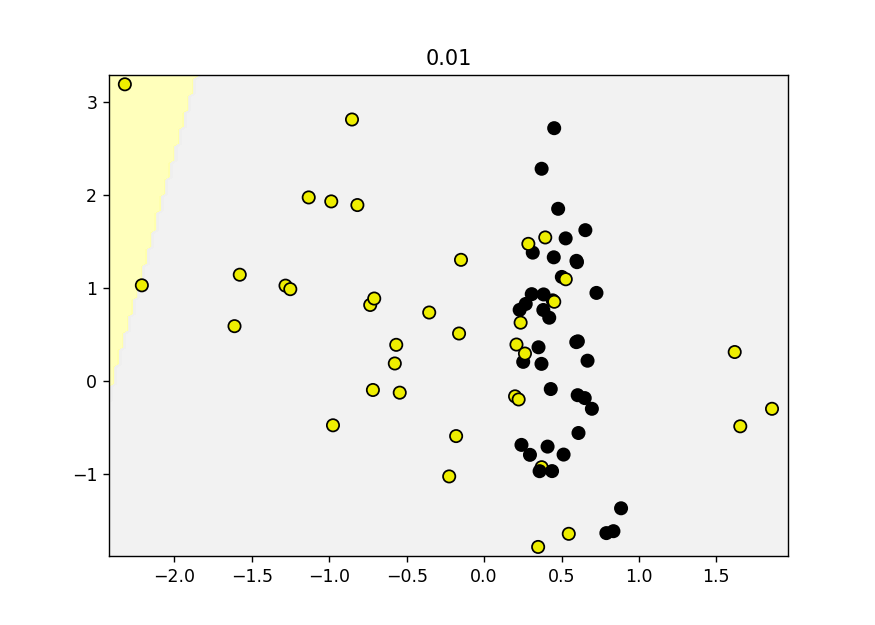

<IPython.core.display.Javascript object>


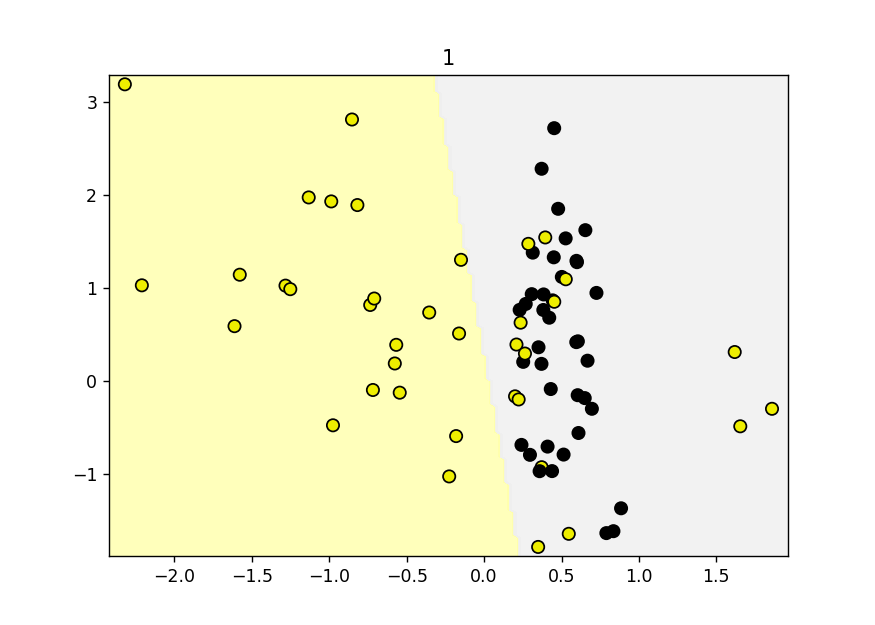

<IPython.core.display.Javascript object>


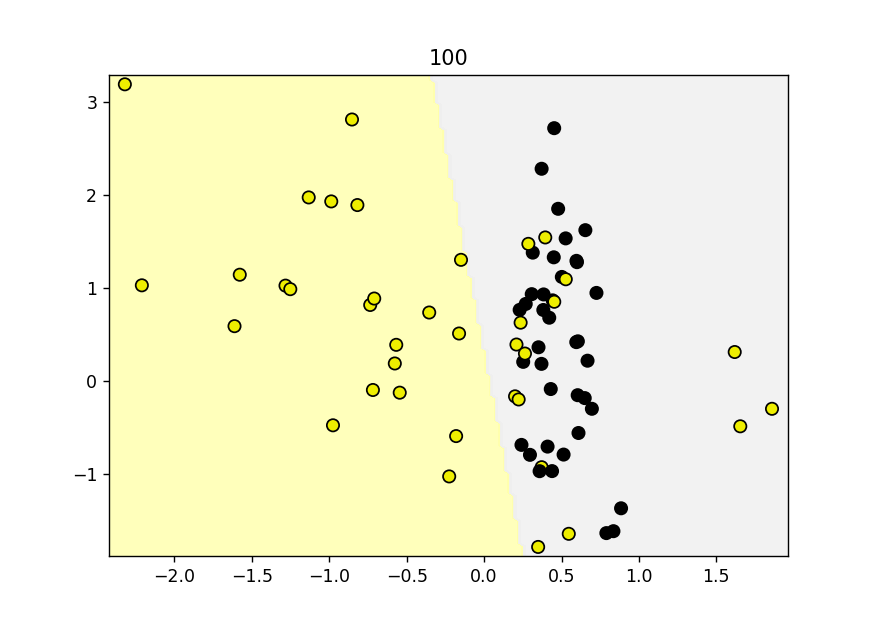

In [66]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = '0.01'
plot_class_regions_for_classifier_subplot(clf1, X_train, y_train, None, None, title, subaxes)


fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = '1'
plot_class_regions_for_classifier_subplot(clf2, X_train, y_train, None, None, title, subaxes)


fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = '100'
plot_class_regions_for_classifier_subplot(clf3, X_train, y_train, None, None, title, subaxes)



#### Aplicacion a un dataset Real


In [55]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clfRD = LinearSVC(C=0.0001, max_iter=1000000).fit(X_train, y_train)

clf3RD = SVC(kernel = 'linear', C=1).fit(X_train, y_train)


#clf = LinearSVC(C=0.0001).fit(X_train, y_train)

#otros valores de C=10000

print(clfRD.score(X_train, y_train))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clfRD.score(X_test, y_test)))

print('Accuracy of  SVC with LInear kernel classifier on training set: {:.2f}'
     .format(clf3RD.score(X_train, y_train)))
print('Accuracy of  SVC with linear kernel classifier on test set: {:.2f}'
     .format(clf3RD.score(X_test, y_test)))

# no hay algoritmos buenos o malos solo datos buenos o malos
# meter en un for...

0.9225352112676056
Accuracy of Linear SVC classifier on test set: 0.94
Accuracy of  SVC with LInear kernel classifier on training set: 0.97
Accuracy of  SVC with linear kernel classifier on test set: 0.96


## Kernelized Support Vector Machines

### Classification

In [71]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)


clf = SVC(kernel='rbf', gamma=1).fit(X_train, y_train)

#otros valores de C=10000

print('D2 dataset')
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


clf = SVC(kernel = 'poly', degree = 2).fit(X_train, y_train)

#otros valores de C=10000

print('D2 dataset')
print('Accuracy of  SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of  SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))



D2 dataset
Accuracy of SVC classifier on training set: 0.95
Accuracy of SVC classifier on test set: 0.72
D2 dataset
Accuracy of  SVC classifier on training set: 0.60
Accuracy of  SVC classifier on test set: 0.64


<IPython.core.display.Javascript object>


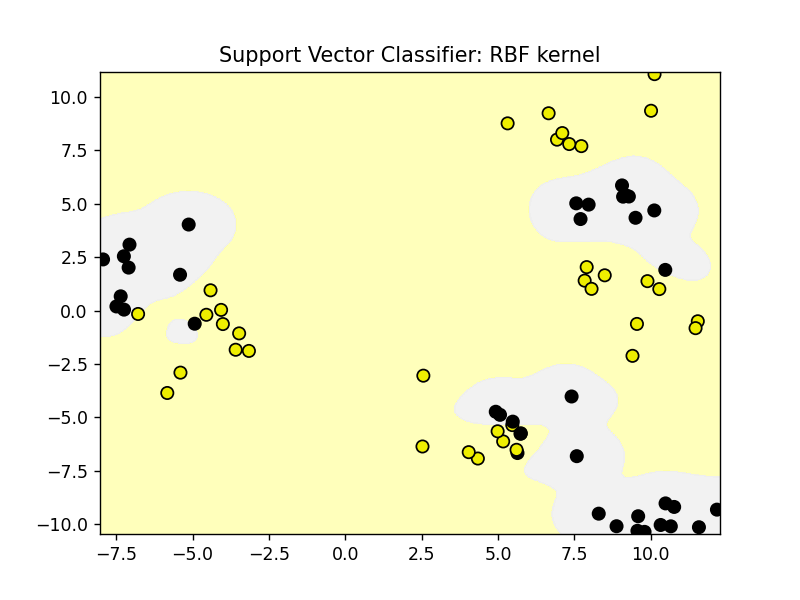

<IPython.core.display.Javascript object>


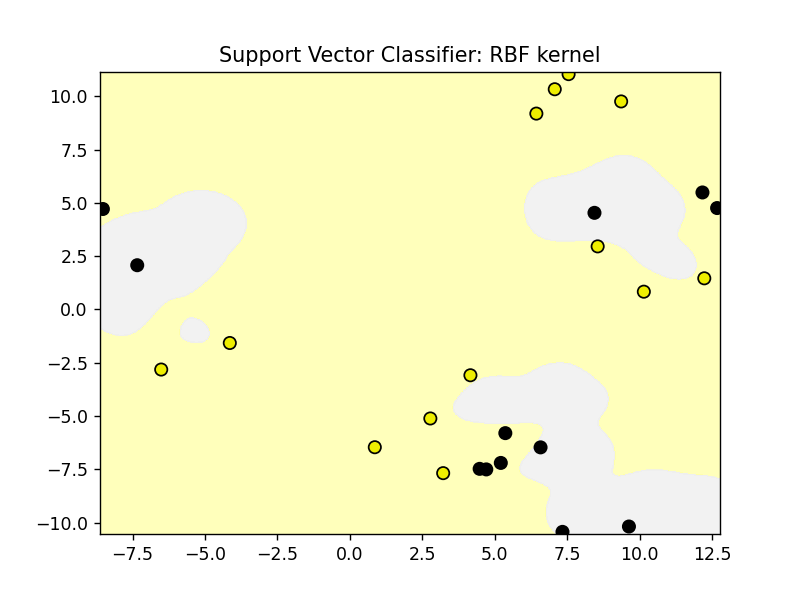

<IPython.core.display.Javascript object>


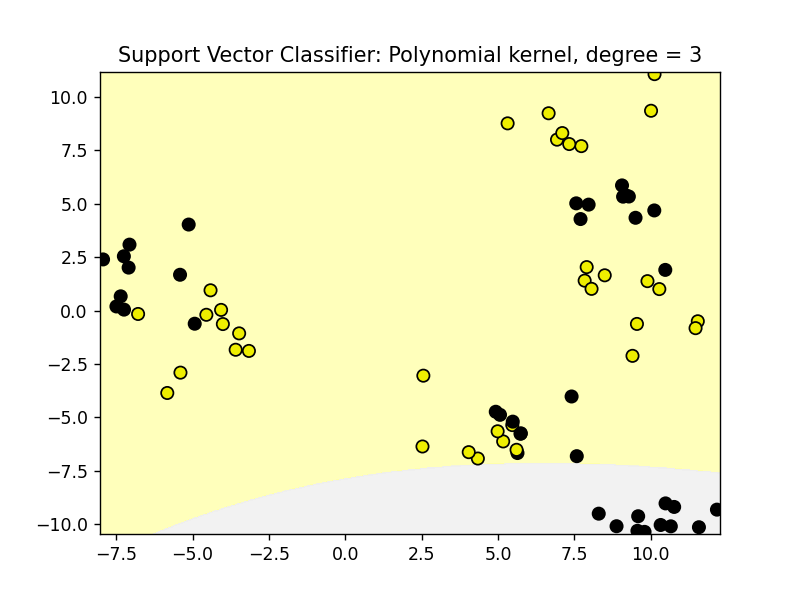

<IPython.core.display.Javascript object>


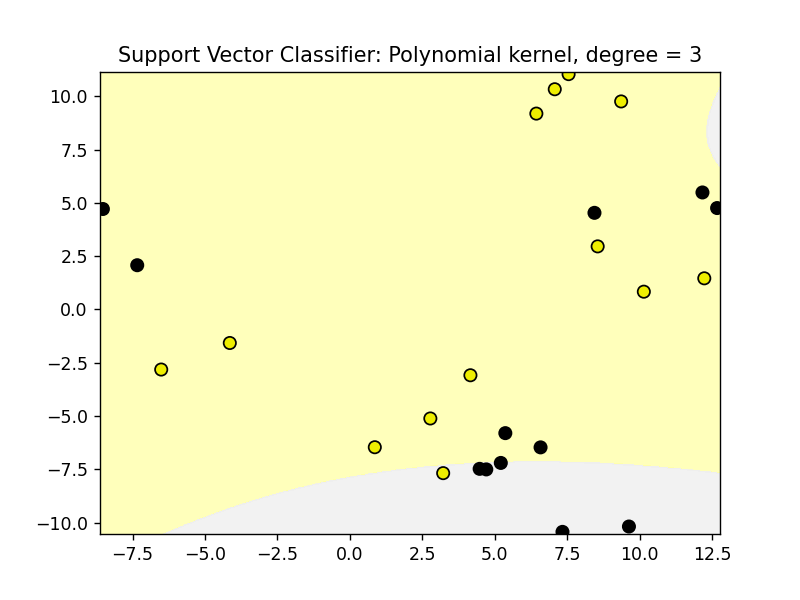

In [72]:

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC(gamma=1).fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

plot_class_regions_for_classifier(SVC(gamma=1).fit(X_train, y_train),
                                 X_test, y_test, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_test,
                                 y_test, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

<IPython.core.display.Javascript object>


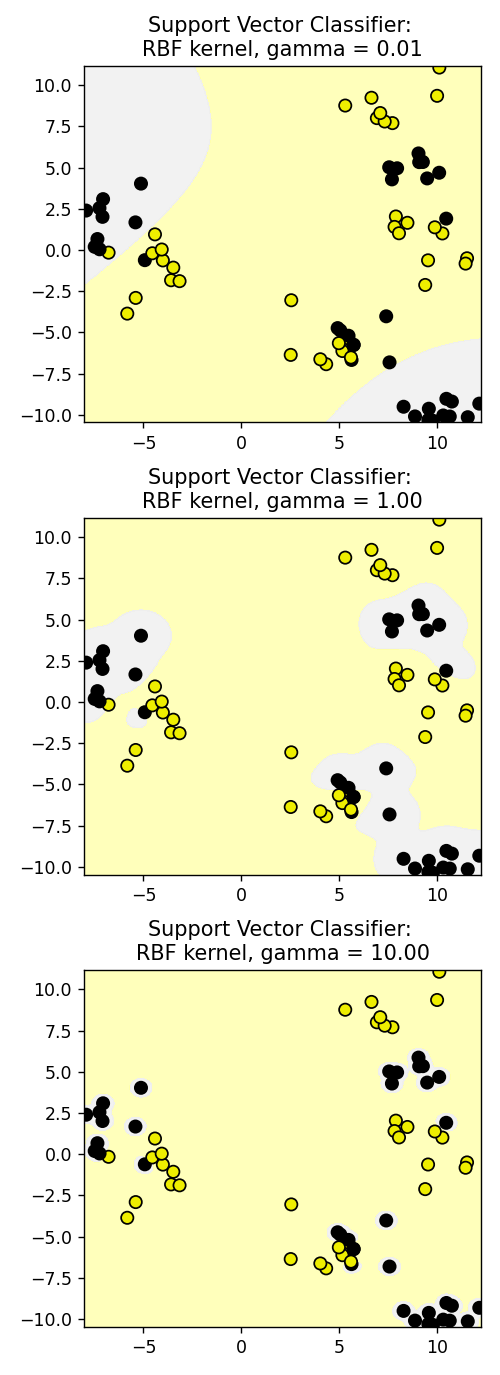

In [21]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

<IPython.core.display.Javascript object>


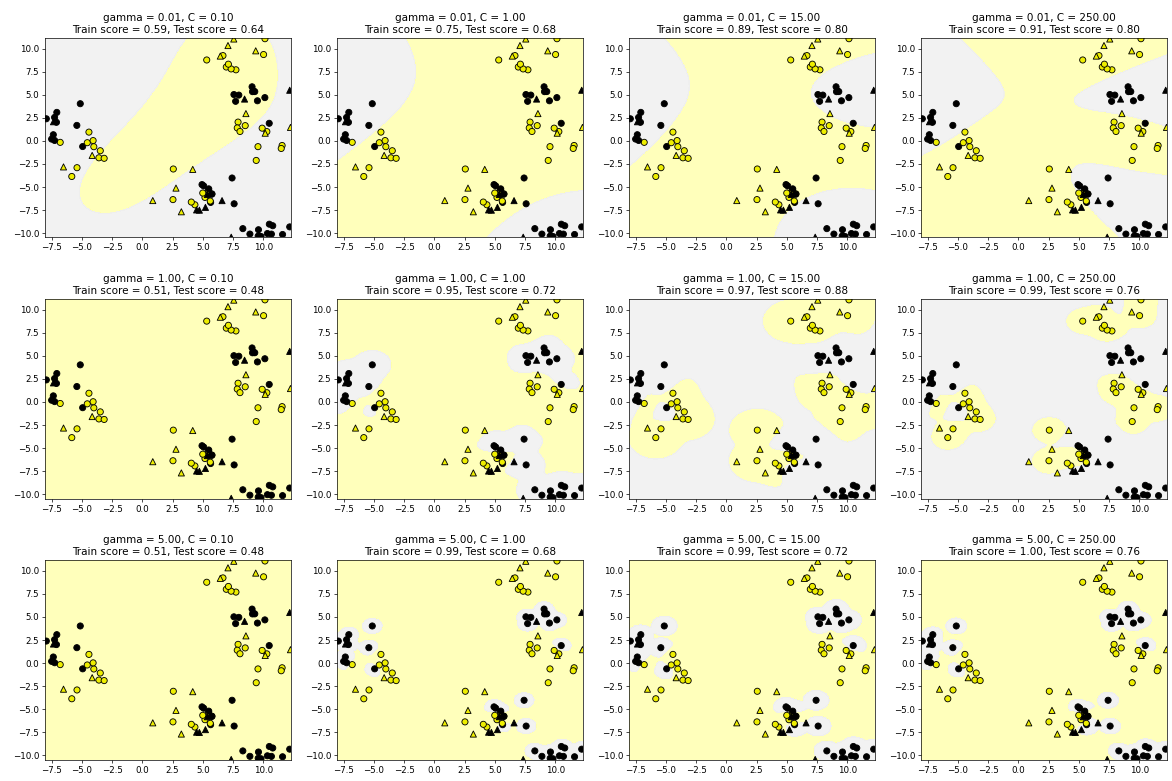

In [22]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [82]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(gamma=1,C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(gamma=1,C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97
